# Hands-on 5: Data-Engineering I - Data Curation

*Note: This lab session is graded. Complete all the exercises, run your code and upload the ipynb file under assignment Hands-on5*

**Deadline is Today (02/21), 11:59 PM**

## Preamble: Python Libraries
- Collection of different modules
- Modules contain bundle of codes that can be repeatedly used in other programs
- Typically the library code are available through functions
- Some libraries are pre-installed in Anaconda and some have to be installed when you use them for the first time
- You should always check documentation and examples provided by the library

In [ ]:
# Generate a random number between 1, 100

import random

print (random.randint(1,100))

# Compute logarithm of a number

import math

print (math.log(100))
print (math.log(100, 10))

# Import only a function / object from Library

from math import log
print (log(100,10))

97
4.605170185988092
2.0
2.0


## Data Collection for Weather Analysis

Let's say we want to perform statistical analysis on weather data for EstesPark, Colorado for the month of January 2023. The data is present at the website: https://www.estesparkweather.net/archive_reports.php?date=202301.

We need to automatically scrape the website, extract relevant data, transform it and store it somewhere for further analysis.

We would need the following Python libraries :

**BeautifulSoup:** It is a powerful Python library for pulling out data from HTML/XML files. It creates a parse tree for parsed pages that can be used to extract data from HTML/XML files.

**Requests:** It is a Python HTTP library. It makes HTTP requests simpler. we just need to add the URL as an argument and the get() gets all the information from it.

**Pandas:** This is the library for loading and transforming data in Tablular format

While "requests" is available by default, we would need to install **BeautifulSoup and Pandas**.

## 0. Open the website and look at the source

1. Goto : https://www.estesparkweather.net/archive_reports.php?date=202308 (This is the data for the month of August 2023).
2. Check the page carefully, what kind of data do you need to extract? What kind of values do they contain? Will the data help in your analysis going forward?
3. Check the source (Typically RightClick->View Page Source). Where is your data of interest in the source? What HTML schema/format does data follow?

## 1. Import libraries (install if needed)

In [1]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


pip commands is how to install libraries that are not there.
py packages is where you can find the commands to install specific libraries.

## 2. Read the webpage and parse it with BeautifulSoup

In [2]:
opened_webpage = requests.get("https://www.estesparkweather.net/archive_reports.php?date=202308")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


## 3. Perform ETL

In the previous class, we discussed ETL, which is a popular data pipeline paradigm. Briefly, the steps are:

**a. Extract:** Get Data from Different Sources Efficiently

**b. Transform:** Perform transformations / calculations on data

**c. Load:** Load the data into the target storage








### 3.1. Extract

Let's extract the data of our interest from the webpage. See, how we are

In [ ]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

['\n\nAug 1 Average and Extremes\n\n\nAverage temperature 63.5°F\n\n\nAverage humidity 69%\n\n\nAverage dewpoint 51.3°F\n\n\nAverage barometer 29.7 in.\n\n\nAverage windspeed 4.4 mph\n\n\nAverage gustspeed 7.0 mph\n\n\nAverage direction 266° ( W )\n\n\nRainfall for month 0.45 in.\n\n\nRainfall for year 15.72 in.\n\n\nMaximum rain per minute 0.02 in. on day 01 at time 15:46\n\n\nMaximum temperature 80.8°F on day 01 at time 14:15\n\n\nMinimum temperature 55.1°F on day 01 at time 23:06\n\n\nMaximum humidity 93% on day 01 at time 22:58\n\n\nMinimum humidity 32% on day 01 at time 14:20\n\n\nMaximum pressure 29.815 in. on day 01 at time 18:03\n\n\nMinimum pressure 29.667 in. on day 01 at time 14:40\n\n\nMaximum windspeed 17.3 mph on day 01 at time 15:49\n\n\nMaximum gust speed 24.2 mph  from 038 °( NE) on day 01 at time 04:14\n\n\nMaximum heat index 79.9°F on day 01 at time 14:14\n\n', '\n\nAug 2 Average and Extremes\n\n\nAverage temperature 63.6°F\n\n\nAverage humidity 68%\n\n\nAverage dewp

### 3.2. Transform

As we can see, the data is not in a great shape. But the good news is that we have everything in the form of a list. We can now use basic python operations that we discussed in the first and second hands-on to transform our data

But before that, let's ask this question. In what way I could transform the data so that it could be useful for further analysis?

Well, we wish we had the data in the following table format...

![Screenshot%202023-02-07%20at%204.04.44%20PM.png](attachment:Screenshot%202023-02-07%20at%204.04.44%20PM.png)

In general, a good file format to save this kind of tabular data is **Comma Separated Values (CSV)**

Now let's work towards transforming our data. Our steps could be:

- Define a list of columns and store the column names in the list
- Extract one row from raw data at a time, make a dictionary (key-value pair) out of it, where the keys are the column names and values are the entries
- Convert the data into a dataframe (which is kind of a table object) so that we could do some cleaning and apply additional transformation operations

In [ ]:
column_names = ["Average and Extremes", "Average temperature",
           "Average humidity","Average dewpoint",
           "Average barometer","Average windspeed",
           "Average gustspeed","Average direction",
           "Rainfall for month","Rainfall for year",
           "Maximum rain per minute","Maximum temperature",
           "Minimum temperature","Maximum humidity",
           "Minimum humidity","Maximum pressure",
           "Minimum pressure","Maximum windspeed",
           "Maximum gust speed","Maximum heat index"]

final_data = []

for l in raw_data:
    entries = l.split("\n")
    row = {} # empty dictionary for every row
    for entry in entries:
        for column_name in column_names:
            if column_name in entry:
                entry = entry.replace(column_name,"")
                row[column_name] = entry
                break # stops the inner loop here because we already find a match
    final_data.append(row)

# Sanity check - let's print the first 5 rows
print(final_data[:5])

[{'Average and Extremes': 'Aug 1 ', 'Average temperature': ' 63.5°F', 'Average humidity': ' 69%', 'Average dewpoint': ' 51.3°F', 'Average barometer': ' 29.7 in.', 'Average windspeed': ' 4.4 mph', 'Average gustspeed': ' 7.0 mph', 'Average direction': ' 266° ( W )', 'Rainfall for month': ' 0.45 in.', 'Rainfall for year': ' 15.72 in.', 'Maximum rain per minute': ' 0.02 in. on day 01 at time 15:46', 'Maximum temperature': ' 80.8°F on day 01 at time 14:15', 'Minimum temperature': ' 55.1°F on day 01 at time 23:06', 'Maximum humidity': ' 93% on day 01 at time 22:58', 'Minimum humidity': ' 32% on day 01 at time 14:20', 'Maximum pressure': ' 29.815 in. on day 01 at time 18:03', 'Minimum pressure': ' 29.667 in. on day 01 at time 14:40', 'Maximum windspeed': ' 17.3 mph on day 01 at time 15:49', 'Maximum gust speed': ' 24.2 mph  from 038 °( NE) on day 01 at time 04:14', 'Maximum heat index': ' 79.9°F on day 01 at time 14:14'}, {'Average and Extremes': 'Aug 2 ', 'Average temperature': ' 63.6°F', 'A

#### Convert to DataFrame

A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet. DataFrames are one of the most common data structures used in modern data analytics because they are a flexible and intuitive way of storing and working with data.

We use **Pandas** to convert our data into dataframe

In [ ]:
final_data = pandas.DataFrame(final_data)

# Print a few elements in the dataframe
final_data

,Average and Extremes,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,Aug 1,63.5°F,69%,51.3°F,29.7 in.,4.4 mph,7.0 mph,266° ( W ),0.45 in.,15.72 in.,0.02 in. on day 01 at time 15:46,80.8°F on day 01 at time 14:15,55.1°F on day 01 at time 23:06,93% on day 01 at time 22:58,32% on day 01 at time 14:20,29.815 in. on day 01 at time 18:03,29.667 in. on day 01 at time 14:40,17.3 mph on day 01 at time 15:49,24.2 mph from 038 °( NE) on day 01 at time 0...,79.9°F on day 01 at time 14:14
1,Aug 2,63.6°F,68%,52.2°F,29.8 in.,3.2 mph,5.3 mph,294° (WNW),0.69 in.,15.96 in.,0.01 in. on day 02 at time 19:43,74.1°F on day 02 at time 13:26,56.0°F on day 02 at time 00:25,91% on day 02 at time 14:28,44% on day 02 at time 13:20,29.826 in. on day 02 at time 14:09,29.711 in. on day 02 at time 18:18,17.3 mph on day 02 at time 13:57,25.3 mph from 348 °(NNW) on day 02 at time 1...,77.4°F on day 02 at time 13:26
2,Aug 3,61.2°F,72%,50.4°F,29.7 in.,3.5 mph,5.8 mph,300° (WNW),0.86 in.,16.13 in.,0.01 in. on day 03 at time 18:01,76.4°F on day 03 at time 15:06,49.0°F on day 03 at time 23:26,97% on day 03 at time 08:29,32% on day 03 at time 15:01,29.799 in. on day 03 at time 01:40,29.659 in. on day 03 at time 16:17,13.8 mph on day 03 at time 16:32,24.2 mph from 164 °(SSE) on day 03 at time 1...,78.1°F on day 03 at time 15:07
3,Aug 4,61.2°F,60%,44.5°F,29.8 in.,3.3 mph,5.5 mph,275° ( W ),0.89 in.,16.16 in.,0.01 in. on day 04 at time 08:45,77.2°F on day 04 at time 17:04,45.6°F on day 04 at time 06:26,96% on day 04 at time 06:58,27% on day 04 at time 18:21,29.812 in. on day 04 at time 23:31,29.699 in. on day 04 at time 15:02,18.4 mph on day 04 at time 17:24,32.2 mph from 270 °( W ) on day 04 at time 1...,77.8°F on day 04 at time 16:50
4,Aug 5,58.9°F,61%,43.1°F,29.8 in.,4.1 mph,6.4 mph,273° ( W ),0.89 in.,16.16 in.,0.00 in. on day 05 at time 23:59,78.7°F on day 05 at time 16:26,41.4°F on day 05 at time 06:16,92% on day 05 at time 23:59,24% on day 05 at time 15:40,29.942 in. on day 05 at time 23:20,29.762 in. on day 05 at time 16:14,21.9 mph on day 05 at time 18:47,33.4 mph from 251 °(WSW) on day 05 at time 1...,78.3°F on day 05 at time 16:26
5,Aug 6,52.0°F,92%,49.7°F,29.9 in.,2.1 mph,3.6 mph,65° (ENE),0.90 in.,16.17 in.,0.01 in. on day 06 at time 19:36,57.0°F on day 06 at time 12:33,45.5°F on day 06 at time 23:59,96% on day 06 at time 23:59,80% on day 06 at time 12:24,29.987 in. on day 06 at time 19:34,29.846 in. on day 06 at time 05:02,9.2 mph on day 06 at time 19:08,13.8 mph from 194 °(SSW) on day 06 at time 1...,57.0°F on day 06 at time 12:33
6,Aug 7,54.6°F,71%,43.6°F,29.9 in.,3.6 mph,6.2 mph,292° (WNW),0.90 in.,16.17 in.,0.00 in. on day 07 at time 23:59,74.5°F on day 07 at time 15:48,39.0°F on day 07 at time 05:57,98% on day 07 at time 07:36,33% on day 07 at time 15:46,29.983 in. on day 07 at time 06:49,29.813 in. on day 07 at time 18:28,20.7 mph on day 07 at time 12:43,39.1 mph from 294 °(WNW) on day 07 at time 1...,77.4°F on day 07 at time 15:01
7,Aug 8,56.4°F,68%,44.2°F,29.8 in.,2.1 mph,3.6 mph,63° (ENE),0.90 in.,16.17 in.,0.00 in. on day 08 at time 23:59,73.3°F on day 08 at time 13:47,39.9°F on day 08 at time 06:29,96% on day 08 at time 06:55,29% on day 08 at time 13:59,29.872 in. on day 08 at time 01:11,29.666 in. on day 08 at time 19:28,12.7 mph on day 08 at time 14:22,18.4 mph from 03 °( N ) on day 08 at time 14:25,77.5°F on day 08 at time 12:00
8,Aug 9,58.5°F,62%,43.8°F,29.7 in.,2.9 mph,5.1 mph,268° ( W ),0.90 in.,16.17 in.,0.00 in. on day 09 at time 23:59,72.3°F on day 09 at time 13:25,42.5°F on day 09 at time 06:27,93% on day 09 at time 06:00,31% on day 09 at time 13:15,29.749 in. on day 09 at time 00:00,29.645 in. on day 09 at time 17:21,15.0 mph on day 

At this point we have transformed our data into a decent form. We can choose to store it or do a bit more cleaning and then store.

Some basic cleaning that we can do:

- Does the data contain any duplicate rows? If yes, remove them.
- Does the data contain any NULL entries? If yes, then replace the entry with a default value (we can even remove the row completely).

And some basic statistical analysis before storing the data


#### Duplication Checks and Cleaning

In [ ]:

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Average and Extremes     32 non-null     object 
 1   Average temperature      32 non-null     float64
 2   Average humidity         32 non-null     float64
 3   Average dewpoint         32 non-null     float64
 4   Average barometer        32 non-null     float64
 5   Average windspeed        32 non-null     float64
 6   Average gustspeed        32 non-null     float64
 7   Average direction        32 non-null     object 
 8   Rainfall for month       32 non-null     object 
 9   Rainfall for year        32 non-null     object 
 10  Maximum rain per minute  32 non-null     object 
 11  Maximum temperature      32 non-null     object 
 12  Minimum temperature      32 non-null     object 
 13  Maximum humidity         32 non-null     object 
 14  Minimum humidity         32 

We can see that the data has 33 rows overall and but 32 non-null entries. Let's delete the row with NULL entries

In [ ]:
final_data = final_data.dropna()
final_data

,Average and Extremes,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,Aug 1,63.5°F,69%,51.3°F,29.7 in.,4.4 mph,7.0 mph,266° ( W ),0.45 in.,15.72 in.,0.02 in. on day 01 at time 15:46,80.8°F on day 01 at time 14:15,55.1°F on day 01 at time 23:06,93% on day 01 at time 22:58,32% on day 01 at time 14:20,29.815 in. on day 01 at time 18:03,29.667 in. on day 01 at time 14:40,17.3 mph on day 01 at time 15:49,24.2 mph from 038 °( NE) on day 01 at time 0...,79.9°F on day 01 at time 14:14
1,Aug 2,63.6°F,68%,52.2°F,29.8 in.,3.2 mph,5.3 mph,294° (WNW),0.69 in.,15.96 in.,0.01 in. on day 02 at time 19:43,74.1°F on day 02 at time 13:26,56.0°F on day 02 at time 00:25,91% on day 02 at time 14:28,44% on day 02 at time 13:20,29.826 in. on day 02 at time 14:09,29.711 in. on day 02 at time 18:18,17.3 mph on day 02 at time 13:57,25.3 mph from 348 °(NNW) on day 02 at time 1...,77.4°F on day 02 at time 13:26
2,Aug 3,61.2°F,72%,50.4°F,29.7 in.,3.5 mph,5.8 mph,300° (WNW),0.86 in.,16.13 in.,0.01 in. on day 03 at time 18:01,76.4°F on day 03 at time 15:06,49.0°F on day 03 at time 23:26,97% on day 03 at time 08:29,32% on day 03 at time 15:01,29.799 in. on day 03 at time 01:40,29.659 in. on day 03 at time 16:17,13.8 mph on day 03 at time 16:32,24.2 mph from 164 °(SSE) on day 03 at time 1...,78.1°F on day 03 at time 15:07
3,Aug 4,61.2°F,60%,44.5°F,29.8 in.,3.3 mph,5.5 mph,275° ( W ),0.89 in.,16.16 in.,0.01 in. on day 04 at time 08:45,77.2°F on day 04 at time 17:04,45.6°F on day 04 at time 06:26,96% on day 04 at time 06:58,27% on day 04 at time 18:21,29.812 in. on day 04 at time 23:31,29.699 in. on day 04 at time 15:02,18.4 mph on day 04 at time 17:24,32.2 mph from 270 °( W ) on day 04 at time 1...,77.8°F on day 04 at time 16:50
4,Aug 5,58.9°F,61%,43.1°F,29.8 in.,4.1 mph,6.4 mph,273° ( W ),0.89 in.,16.16 in.,0.00 in. on day 05 at time 23:59,78.7°F on day 05 at time 16:26,41.4°F on day 05 at time 06:16,92% on day 05 at time 23:59,24% on day 05 at time 15:40,29.942 in. on day 05 at time 23:20,29.762 in. on day 05 at time 16:14,21.9 mph on day 05 at time 18:47,33.4 mph from 251 °(WSW) on day 05 at time 1...,78.3°F on day 05 at time 16:26
5,Aug 6,52.0°F,92%,49.7°F,29.9 in.,2.1 mph,3.6 mph,65° (ENE),0.90 in.,16.17 in.,0.01 in. on day 06 at time 19:36,57.0°F on day 06 at time 12:33,45.5°F on day 06 at time 23:59,96% on day 06 at time 23:59,80% on day 06 at time 12:24,29.987 in. on day 06 at time 19:34,29.846 in. on day 06 at time 05:02,9.2 mph on day 06 at time 19:08,13.8 mph from 194 °(SSW) on day 06 at time 1...,57.0°F on day 06 at time 12:33
6,Aug 7,54.6°F,71%,43.6°F,29.9 in.,3.6 mph,6.2 mph,292° (WNW),0.90 in.,16.17 in.,0.00 in. on day 07 at time 23:59,74.5°F on day 07 at time 15:48,39.0°F on day 07 at time 05:57,98% on day 07 at time 07:36,33% on day 07 at time 15:46,29.983 in. on day 07 at time 06:49,29.813 in. on day 07 at time 18:28,20.7 mph on day 07 at time 12:43,39.1 mph from 294 °(WNW) on day 07 at time 1...,77.4°F on day 07 at time 15:01
7,Aug 8,56.4°F,68%,44.2°F,29.8 in.,2.1 mph,3.6 mph,63° (ENE),0.90 in.,16.17 in.,0.00 in. on day 08 at time 23:59,73.3°F on day 08 at time 13:47,39.9°F on day 08 at time 06:29,96% on day 08 at time 06:55,29% on day 08 at time 13:59,29.872 in. on day 08 at time 01:11,29.666 in. on day 08 at time 19:28,12.7 mph on day 08 at time 14:22,18.4 mph from 03 °( N ) on day 08 at time 14:25,77.5°F on day 08 at time 12:00
8,Aug 9,58.5°F,62%,43.8°F,29.7 in.,2.9 mph,5.1 mph,268° ( W ),0.90 in.,16.17 in.,0.00 in. on day 09 at time 23:59,72.3°F on day 09 at time 13:25,42.5°F on day 09 at time 06:27,93% on day 09 at time 06:00,31% on day 09 at time 13:15,29.749 in. on day 09 at time 00:00,29.645 in. on day 09 at time 17:21,15.0 mph on day 

**[Additional Transformations]** We can remove unnecessary strings (e.g. "F" for fahrenheit) and "%" Symbol and convert these columns into integer/float


In [ ]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("°F","")
    s = s.replace("in.","")
    s = s.replace("mph","")
    # s = s.split(" ")
    converted = float(s)
    return converted

final_data["Average temperature"] = final_data["Average temperature"].apply(clearn_string_and_convert)
final_data["Average humidity"] = final_data["Average humidity"].apply(clearn_string_and_convert)
final_data["Average dewpoint"] = final_data["Average dewpoint"].apply(clearn_string_and_convert)
final_data["Average barometer"] = final_data["Average barometer"].apply(clearn_string_and_convert)
final_data["Average windspeed"] = final_data["Average windspeed"].apply(clearn_string_and_convert)
final_data["Average gustspeed"] = final_data["Average gustspeed"].apply(clearn_string_and_convert)

final_data

,Average and Extremes,Average temperature,Average humidity,Average dewpoint,Average barometer,Average windspeed,Average gustspeed,Average direction,Rainfall for month,Rainfall for year,Maximum rain per minute,Maximum temperature,Minimum temperature,Maximum humidity,Minimum humidity,Maximum pressure,Minimum pressure,Maximum windspeed,Maximum gust speed,Maximum heat index
0,Aug 1,63.5,69.0,51.3,29.700,4.4,7.0,266° ( W ),0.45 in.,15.72 in.,0.02 in. on day 01 at time 15:46,80.8°F on day 01 at time 14:15,55.1°F on day 01 at time 23:06,93% on day 01 at time 22:58,32% on day 01 at time 14:20,29.815 in. on day 01 at time 18:03,29.667 in. on day 01 at time 14:40,17.3 mph on day 01 at time 15:49,24.2 mph from 038 °( NE) on day 01 at time 0...,79.9°F on day 01 at time 14:14
1,Aug 2,63.6,68.0,52.2,29.800,3.2,5.3,294° (WNW),0.69 in.,15.96 in.,0.01 in. on day 02 at time 19:43,74.1°F on day 02 at time 13:26,56.0°F on day 02 at time 00:25,91% on day 02 at time 14:28,44% on day 02 at time 13:20,29.826 in. on day 02 at time 14:09,29.711 in. on day 02 at time 18:18,17.3 mph on day 02 at time 13:57,25.3 mph from 348 °(NNW) on day 02 at time 1...,77.4°F on day 02 at time 13:26
2,Aug 3,61.2,72.0,50.4,29.700,3.5,5.8,300° (WNW),0.86 in.,16.13 in.,0.01 in. on day 03 at time 18:01,76.4°F on day 03 at time 15:06,49.0°F on day 03 at time 23:26,97% on day 03 at time 08:29,32% on day 03 at time 15:01,29.799 in. on day 03 at time 01:40,29.659 in. on day 03 at time 16:17,13.8 mph on day 03 at time 16:32,24.2 mph from 164 °(SSE) on day 03 at time 1...,78.1°F on day 03 at time 15:07
3,Aug 4,61.2,60.0,44.5,29.800,3.3,5.5,275° ( W ),0.89 in.,16.16 in.,0.01 in. on day 04 at time 08:45,77.2°F on day 04 at time 17:04,45.6°F on day 04 at time 06:26,96% on day 04 at time 06:58,27% on day 04 at time 18:21,29.812 in. on day 04 at time 23:31,29.699 in. on day 04 at time 15:02,18.4 mph on day 04 at time 17:24,32.2 mph from 270 °( W ) on day 04 at time 1...,77.8°F on day 04 at time 16:50
4,Aug 5,58.9,61.0,43.1,29.800,4.1,6.4,273° ( W ),0.89 in.,16.16 in.,0.00 in. on day 05 at time 23:59,78.7°F on day 05 at time 16:26,41.4°F on day 05 at time 06:16,92% on day 05 at time 23:59,24% on day 05 at time 15:40,29.942 in. on day 05 at time 23:20,29.762 in. on day 05 at time 16:14,21.9 mph on day 05 at time 18:47,33.4 mph from 251 °(WSW) on day 05 at time 1...,78.3°F on day 05 at time 16:26
5,Aug 6,52.0,92.0,49.7,29.900,2.1,3.6,65° (ENE),0.90 in.,16.17 in.,0.01 in. on day 06 at time 19:36,57.0°F on day 06 at time 12:33,45.5°F on day 06 at time 23:59,96% on day 06 at time 23:59,80% on day 06 at time 12:24,29.987 in. on day 06 at time 19:34,29.846 in. on day 06 at time 05:02,9.2 mph on day 06 at time 19:08,13.8 mph from 194 °(SSW) on day 06 at time 1...,57.0°F on day 06 at time 12:33
6,Aug 7,54.6,71.0,43.6,29.900,3.6,6.2,292° (WNW),0.90 in.,16.17 in.,0.00 in. on day 07 at time 23:59,74.5°F on day 07 at time 15:48,39.0°F on day 07 at time 05:57,98% on day 07 at time 07:36,33% on day 07 at time 15:46,29.983 in. on day 07 at time 06:49,29.813 in. on day 07 at time 18:28,20.7 mph on day 07 at time 12:43,39.1 mph from 294 °(WNW) on day 07 at time 1...,77.4°F on day 07 at time 15:01
7,Aug 8,56.4,68.0,44.2,29.800,2.1,3.6,63° (ENE),0.90 in.,16.17 in.,0.00 in. on day 08 at time 23:59,73.3°F on day 08 at time 13:47,39.9°F on day 08 at time 06:29,96% on day 08 at time 06:55,29% on day 08 at time 13:59,29.872 in. on day 08 at time 01:11,29.666 in. on day 08 at time 19:28,12.7 mph on day 08 at time 14:22,18.4 mph from 03 °( N ) on day 08 at time 14:25,77.5°F on day 08 at time 12:00
8,Aug 9,58.5,62.0,43.8,29.700,2.9,5.1,268° ( W ),0.90 in.,16.17 in.,0.00 in. on day 09 at time 23:59,72.3°F on day 09 at time 13:25,42.5°F on day 09 at time 06:27,93% on day 09 at time 06:00,31% on day 09 at time 13:15,29.749 in. on day 09 at time 00:00,29.645 in. on day 09 at time 17:21,15.0 mph on day 09 at time 13:37,20.7 mph from 258 °(WSW) on day 09 at time 1...,77.5°F on day 09 at time 14:52
9,Aug 10,60.5,56.0,41

**[Optional]** Describe some of your columns

In [ ]:
final_data["Average temperature"].describe()

count    32.000000
mean     61.193750
std       4.943157
min      52.000000
25%      56.875000
50%      61.350000
75%      64.225000
max      71.400000
Name: Average temperature, dtype: float64

**[Optional]** Plot a histogram of a column

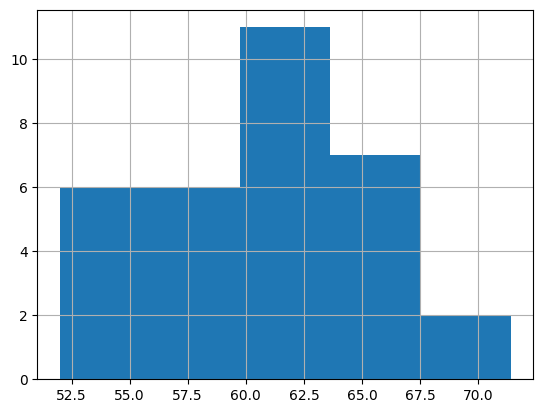

In [ ]:
hist = final_data["Average temperature"].hist(bins=5)

We will look into visualizations in the next hands-on

### 3.3 Load

Now, let's store the DataFrame table that we created on our local disk so that we can use it later. We choose to convert it to a CSV format. It is quite simple with Pandas dataframes.

In [ ]:
final_data.to_csv("EstesPark_Weather_January_2023.csv")

## Exercise E1: ETL data for January 2023

- Repeat the steps shown in section 2 and 3 above for January 2006.
- Extract January 2006 data from https://www.estesparkweather.net/archive_reports.php?date=200601
- Perform transform steps in the same way as shown in 3.2 and save the data on your laptop.
- Describe "Average temperature" using `describe()` function shown under 3.2. What differences do you see between August 2023 and January 2023.
- **Optional**: Try the same exercise for an earlier month (say a month in 2006). What difference in statistics do you see. Can you say that global warming is real based on the data?

Webpage opened successfully...
b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<!-- DW6 -->\n<head>\n<!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->\n<meta http-equiv="Refresh" content="300" />\n<meta http-equiv="Pragma" content="no-cache" />\n<meta http-equiv="Cache-Control" content="no-cache" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n<meta name="ICBM" content="37.27465, -122.02295" />\n<meta name="DC.title" content="Estes Park, Colorado Weather Station" />\n<meta name="author" content="Gregory Truta" />\n<meta name="copyright" content="&copy; 2007 EstesParkWeather.net" />\n<meta name="Keywords" content="weather, Weather, temperature, dew point, humidity, forecast, Davis Vantage Pro, Estes Park Colorado Weather, Colorado Weather, CO Weather, weather conditions, live weather, live weather conditions, weather data, weather hist

0     28.5
1     20.4
2     21.8
3     23.1
4     33.3
5     34.2
6     32.3
7     35.4
8     36.0
9     38.1
10    30.3
11    32.5
12    42.9
13    42.9
14    31.1
15    30.7
16    22.6
17    20.7
18    22.9
19    14.4
20    13.7
21    22.1
22    20.2
23    19.9
24    17.6
25    20.8
26    26.8
27    21.0
28    -0.8
29    -0.1
30    16.6
31    24.9
Name: Average temperature, dtype: float64

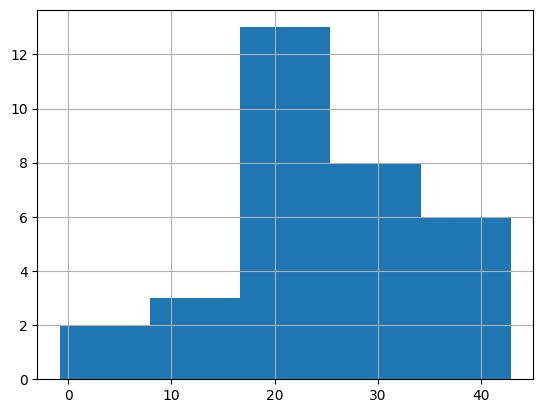

In [21]:
opened_webpage = requests.get("https://www.estesparkweather.net/archive_reports.php?date=202301")
print ("Webpage opened successfully...")
print (opened_webpage.content)

# Initialize a BeautifulSoup object to read and parse the webpage read
# This is like calling the __init__ function in BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find_all("table")

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data)

column_names = ["Average and Extremes", "Average temperature",
           "Average humidity","Average dewpoint",
           "Average barometer","Average windspeed",
           "Average gustspeed","Average direction",
           "Rainfall for month","Rainfall for year",
           "Maximum rain per minute","Maximum temperature",
           "Minimum temperature","Maximum humidity",
           "Minimum humidity","Maximum pressure",
           "Minimum pressure","Maximum windspeed",
           "Maximum gust speed","Maximum heat index"]

final_data = []

for l in raw_data:
    entries = l.split("\n")
    row = {} # empty dictionary for every row
    for entry in entries:
        for column_name in column_names:
            if column_name in entry:
                entry = entry.replace(column_name,"")
                row[column_name] = entry
                break # stops the inner loop here because we already find a match
    final_data.append(row)

# Sanity check - let's print the first 5 rows
print(final_data[:5])

final_data = pandas.DataFrame(final_data)

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

final_data = final_data.dropna()
final_data

# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("°F","")
    s = s.replace("in.","")
    s = s.replace("mph","")
    # s = s.split(" ")
    converted = float(s)
    return converted

final_data["Average temperature"] = final_data["Average temperature"].apply(clearn_string_and_convert)
final_data["Average humidity"] = final_data["Average humidity"].apply(clearn_string_and_convert)
final_data["Average dewpoint"] = final_data["Average dewpoint"].apply(clearn_string_and_convert)
final_data["Average barometer"] = final_data["Average barometer"].apply(clearn_string_and_convert)
final_data["Average windspeed"] = final_data["Average windspeed"].apply(clearn_string_and_convert)
final_data["Average gustspeed"] = final_data["Average gustspeed"].apply(clearn_string_and_convert)

# Print a few elements in the dataframe
final_data

final_data["Average temperature"].describe()

hist = final_data["Average temperature"].hist(bins=5)


final_data["Average temperature"]

The distribution looks similar in both August and January, however, if you look at the scale, January is definitely colder.

## [Optinal] Exercise E2: Commit and push this ipynb file into your github repository

After completing E1, add, commit and push this ipynb file into your github repository that you created in Hands_on4. Share your github link in the comment secion of the assignment in Canvas.

## Question: How much extra time did you need?

In [ ]:
2 mins